<a href="https://colab.research.google.com/github/itsyourgirlnicky/Stroke-Data-Analysis/blob/main/stroke_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STROKE DATA ANALYSIS**
This is the dataset        https://drive.google.com/file/d/1JcqDBxq0D9a_hR1pP36SF159DmJvFU_k/view

## **Specific Objectives:**

I. **Identify Demographic Trends**
   Explore and analyze demographic factors such as age, gender, marital status, and residence type to identify any trends or patterns related to strokes.

II. **Assess Health Metrics Impact**
    Investigate the impact of health metrics, including hypertension, heart disease, average glucose level, and BMI, on the occurrence of strokes.

III. **Evaluate Lifestyle Factors**
     Examine lifestyle factors, specifically smoking status and work type, to understand their association with strokes.

IV. **Explore Correlations**
    Conduct correlation analysis to identify relationships between different health conditions (hypertension, heart disease) and understand their potential collective influen on strokes.
 on strokes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
from google.colab import files

uploaded = files.upload()
df = pd.read_csv ('/content/stroke_data.csv')

Saving stroke_data.csv to stroke_data.csv


## DATA INSPECTION

1. **Preview rows of the dataset.**
2. **Check for data types of each column.**
3. **Check for missing values in each column.**
4. **Check data shape.**
5. **Check column names.**
6. **Explore unique values in categorical columns.**
7. **Explore summary statistics for numeric columns.**
8. **Check for duplicates.**
9. **Outliers**

In [ ]:
# 1. Preview rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# New Section

In [ ]:
# 2.Display data types of each column
print("Original Data Types:")
df.dtypes

Original Data Types:


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# 3. Count missing values in each column
missing_values = df.isnull().sum() #calculates the number of missing columns
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# 4.Display the shape of the DataFrame
data_shape = df.shape
print("Number of Rows:", data_shape[0])  #counts rows
print("Number of Columns:", data_shape[1]) #counts columns

Number of Rows: 5110
Number of Columns: 12


In [ ]:
#5 .Display column names
column_names = df.columns
print("Column Names:")
print(column_names)

Column Names:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
# 6 .Checking for uniques values in all columns
# Loop through each column and print unique values
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique Values in '{column_name}':")
    print(unique_values)
    print("\n" + "="*50 + "\n")  # Separating output for each column

Unique Values in 'id':
[ 9046 51676 31112 ... 19723 37544 44679]


Unique Values in 'gender':
['Male' 'Female' 'Other']


Unique Values in 'age':
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e

In [ ]:
# 7.Display summary statistics for numeric columns(mean,std,max,min etc)   for only numeric values
numeric_summary = df.describe()
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

Summary Statistics for Numeric Columns:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%

In [ ]:
# 8.Check for duplicate rows
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

# Output the number of duplicate rows
print("Number of Duplicate Rows:", num_duplicate_rows)

# Display the duplicate rows
if num_duplicate_rows > 0:
    print("\nDuplicate Rows:")
    print(duplicate_rows)

Number of Duplicate Rows: 0


In [ ]:
# 9. Outliers
Q1= df['bmi'].quantile(0.25)
Q3= df['bmi'].quantile(0.75)
IQR = Q3 - Q1

#creating the upper and lower bounds
upper_bound_bmi = Q3 + 1.5*IQR
lower_bound_bmi = Q1 - 1.5*IQR

#defining outliers
outliers = df[(df['bmi'] < lower_bound_bmi) | (df['bmi'] > upper_bound_bmi)]

Q1= df['avg_glucose_level'].quantile(0.25)
Q3= df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

#creating the upper and lower bounds
upper_bound_glucose = Q3 + 1.5*IQR
lower_bound_glucose = Q1 - 1.5*IQR

#defining outliers
outliers = df[(df['avg_glucose_level'] < lower_bound_glucose)| (df['avg_glucose_level']>upper_bound_glucose)]



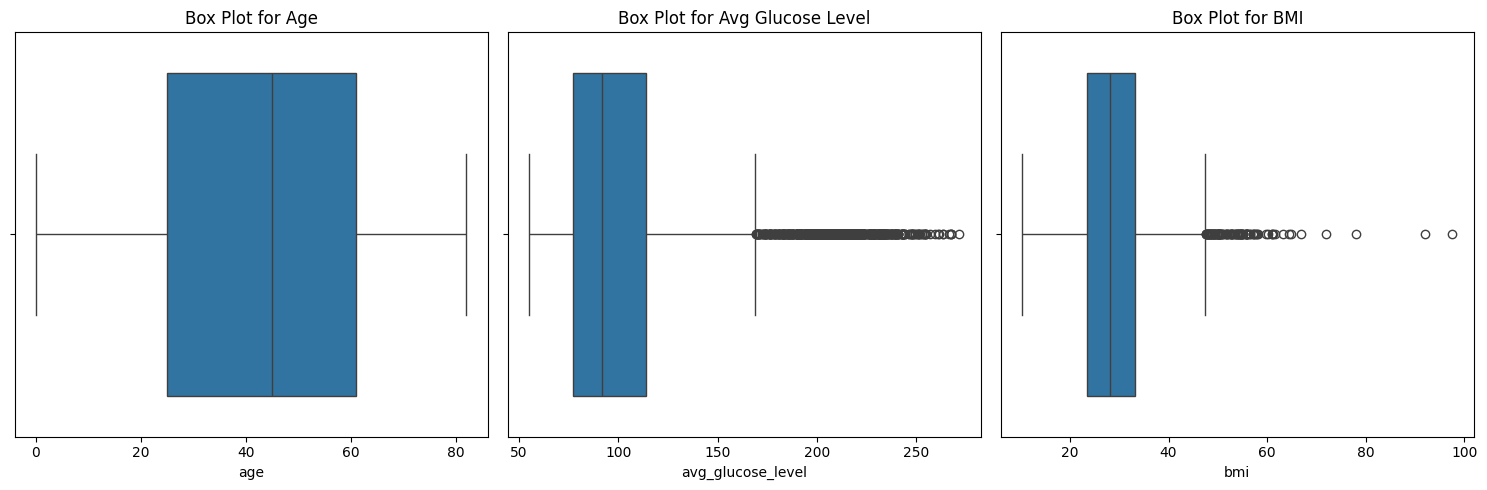

In [ ]:
# 9. outlier plot
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for 'age'
sns.boxplot(x=df['age'], ax=axes[0])
axes[0].set_title('Box Plot for Age')

# Box plot for 'avg_glucose_level'
sns.boxplot(x=df['avg_glucose_level'], ax=axes[1])
axes[1].set_title('Box Plot for Avg Glucose Level')

# Box plot for 'bmi'
sns.boxplot(x=df['bmi'], ax=axes[2])
axes[2].set_title('Box Plot for BMI')

# Adjust layout
plt.tight_layout()
plt.show()

DATA CLEANING
1.Handling Missing Values

2.Convert Data Types

3.Handling Outliers

In [ ]:

# 1.Handling the missing values ( bmi 201 )
# Calculate the median of the 'bmi' column
bmi_median = df['bmi'].median()

# Fill missing values in 'bmi' with the median
df['bmi'].fillna(bmi_median, inplace=True)

# Check for any remaining missing values
missing_values_after_cleaning = df.isnull().sum()

# Print the result
print("Missing Values per Column after cleaning:")
print(missing_values_after_cleaning)


Missing Values per Column after cleaning:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
#2.Convert Datatypes (GENDER,EVERMARRIED,WORKTYPE,RESIDENCETYPE,SMOKINGSTATUS)
# Using the category data type for certain columns can be beneficial in terms of memory usage and performance
df['gender'] = df['gender'].astype('category')
df['ever_married'] = df['ever_married'].astype('category')
df['work_type'] = df['work_type'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')

# Check the resulting data types
print(df.dtypes)

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


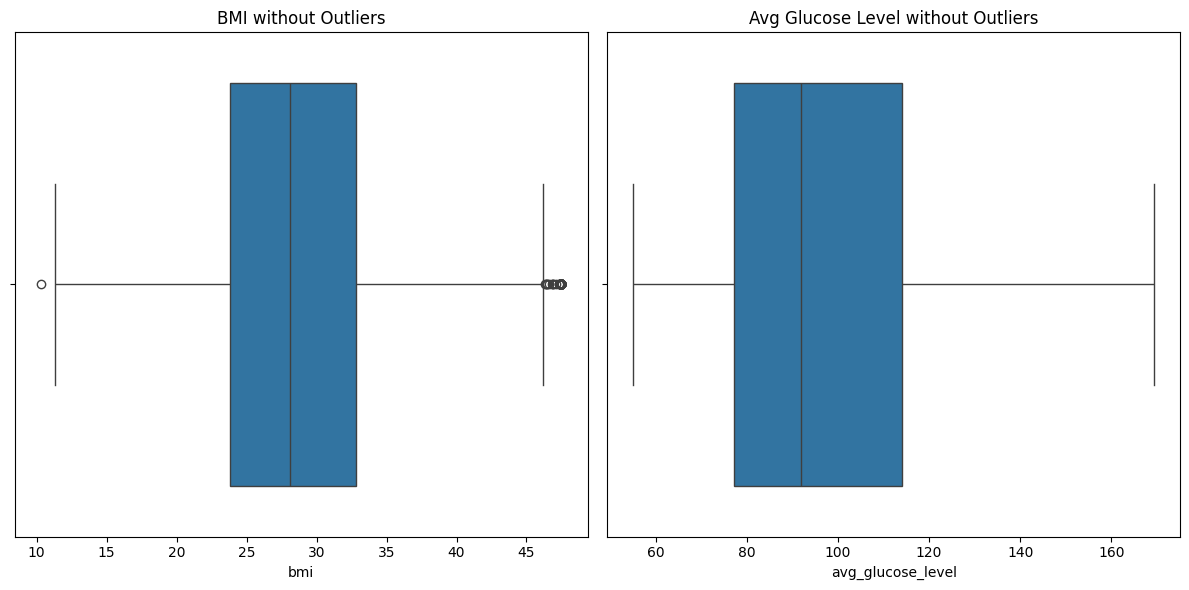

In [ ]:
#3.Handling Outliers (BMI,GLUCOSE LEVEL)
# drop any outliers using .clip function- used to limit the values in arrays
df['bmi'] = df['bmi'].clip(lower =  lower_bound_bmi, upper = upper_bound_bmi)

# drop any outliers using .clip function- used to limit the values in arrays
df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower =  lower_bound_glucose, upper = upper_bound_glucose)

# Plotting BMI without outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'])
plt.title('BMI without Outliers')

# Plotting Avg Glucose Level without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Avg Glucose Level without Outliers')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


# Exploratory Data Analysis (EDA)

1.Generate descriptive statistics for numerical columns (mean, median, std, etc.).

2Explore the distribution of age, avg_glucose_level, and bmi.

3.Visualize the distribution of strokes in the dataset.

4.Analyze the distribution of gender, work_type, and smoking_status with respect to strokes.

5.Explore the correlation between hypertension, heart_disease, and strokes.

6.Calculate the average age for each combination of gender and stroke using groupby

7.Create a crosstab to show the count of people with hypertension and heart disease using cross tab



In [ ]:
# 1. Generate descriptive statistics for numerical columns (mean, median, std, etc.).
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,100.996204,28.718200,0.048728
std,21161.721625,22.612647,0.296607,0.226063,33.214738,7.191492,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,169.357500,47.500000,1.000000


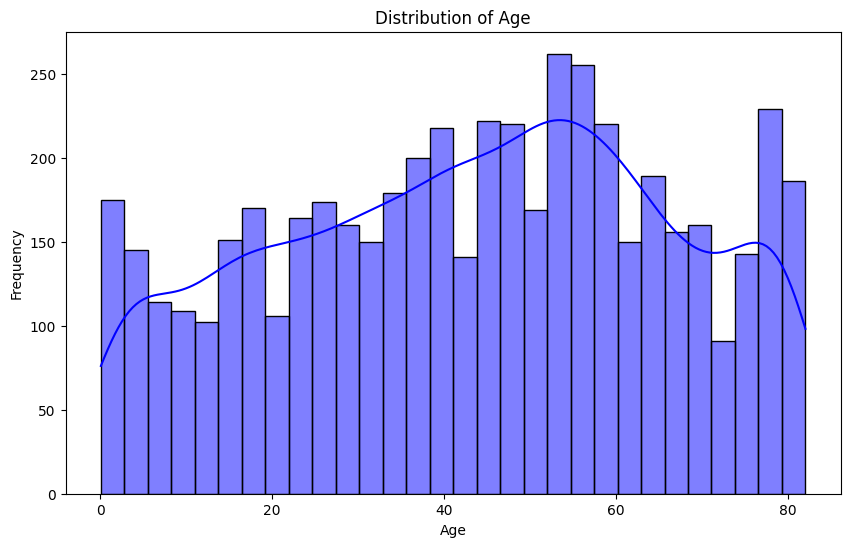

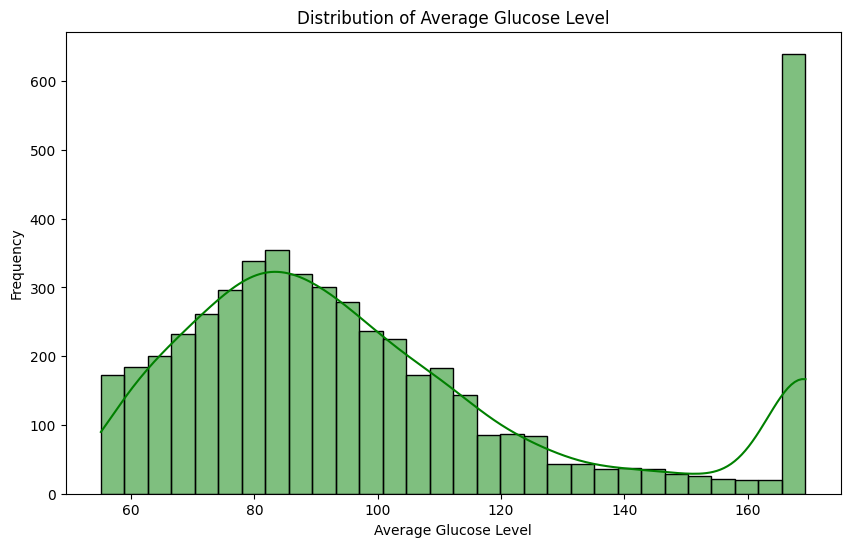

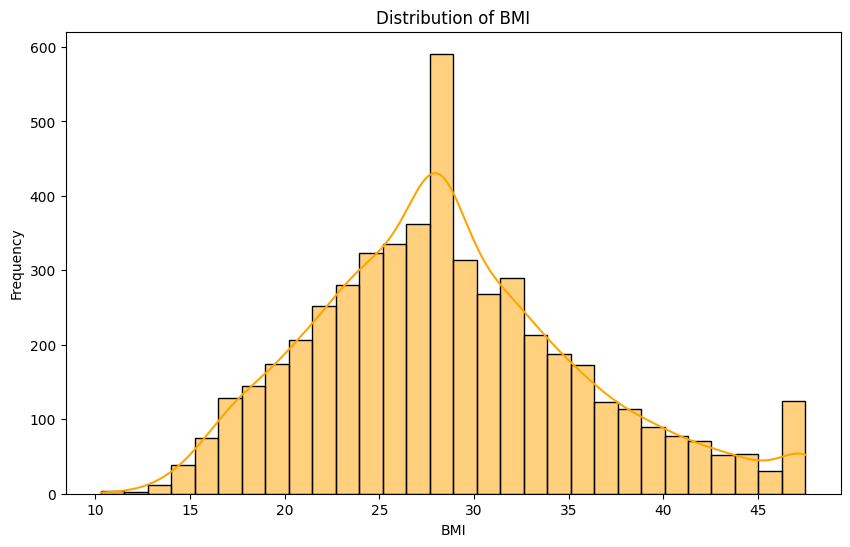

In [ ]:
# 2. Distribution of age,avg_glucose_level,bmi

age_distribution = df['age']
glucose_level_distribution = df['avg_glucose_level']
bmi_distribution = df['bmi']

# Plotting age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_distribution, kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting average glucose level distribution
plt.figure(figsize=(10, 6))
sns.histplot(glucose_level_distribution, kde=True, bins=30, color='green')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

# Plotting BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(bmi_distribution, kde=True, bins=30, color='orange')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


<ipython-input-19-6605bc3d50a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_distribution, palette='viridis')


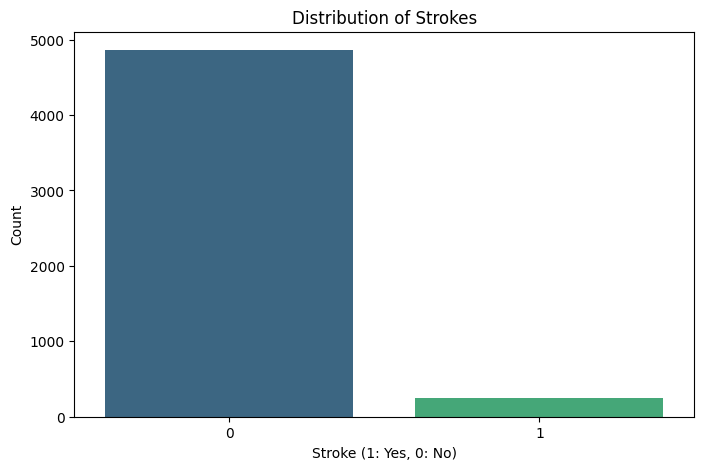

In [ ]:
# 3.Visualize the distribution of strokes in the dataset
stroke_distribution = df['stroke']

# Plotting the distribution of strokes
plt.figure(figsize=(8, 5))
sns.countplot(x=stroke_distribution, palette='viridis')
plt.title('Distribution of Strokes')
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


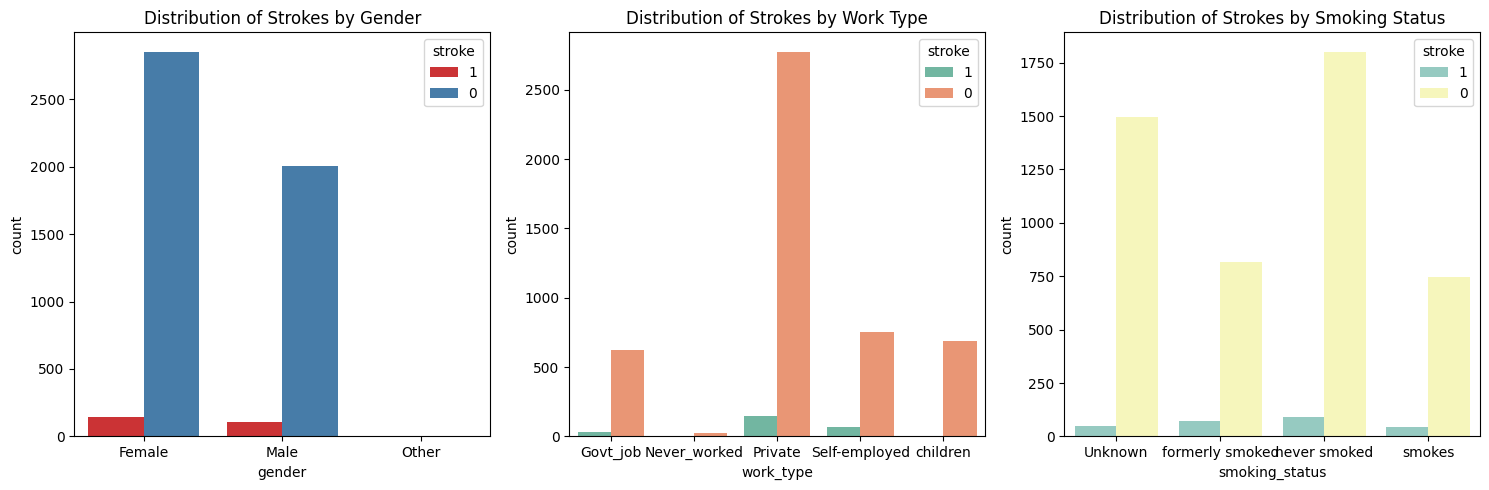

In [ ]:
# 4.Analyze the distribution of gender, work_type, and smoking_status with respect to strokes.
# Plotting the distribution of strokes with respect to gender
df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='gender', hue='stroke', data=df, palette='Set1')
plt.title('Distribution of Strokes by Gender')

# Plotting the distribution of strokes with respect to work type
plt.subplot(1, 3, 2)
sns.countplot(x='work_type', hue='stroke', data=df, palette='Set2')
plt.title('Distribution of Strokes by Work Type')

# Plotting the distribution of strokes with respect to smoking status
plt.subplot(1, 3, 3)
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='Set3')
plt.title('Distribution of Strokes by Smoking Status')

plt.tight_layout()
plt.show()

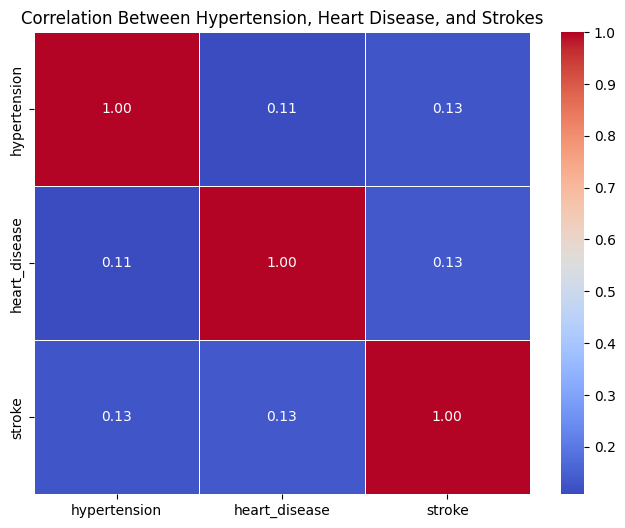

In [ ]:
# 5. Explore the correlation between hypertension, heart_disease, and strokes.
correlation_matrix = df[['hypertension', 'heart_disease', 'stroke']].corr(numeric_only=False)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Hypertension, Heart Disease, and Strokes')
plt.show()


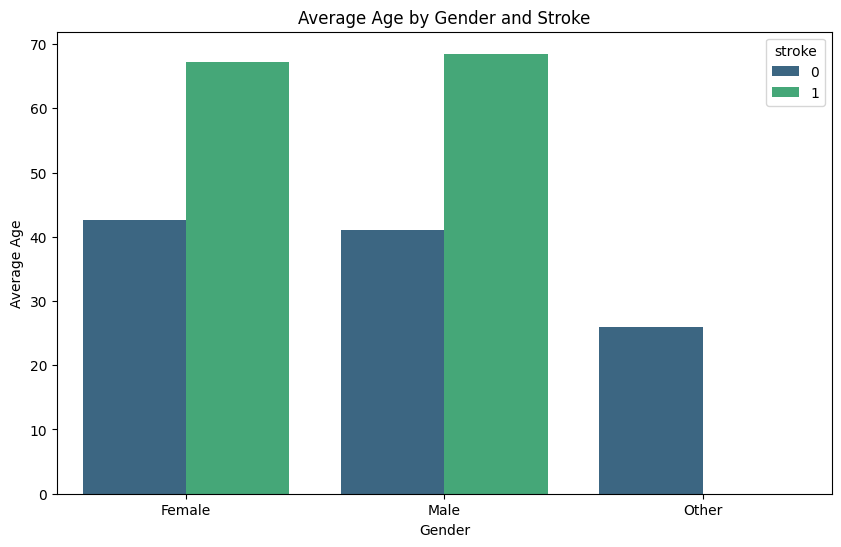

In [ ]:
# 6.Calculate the average age for each combination of gender and stroke using groupby
average_age_by_gender_stroke = df.groupby(['gender', 'stroke'])['age'].mean()

# Convert the multi-index to columns for easy plotting
average_age_by_gender_stroke_df = average_age_by_gender_stroke.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='age', hue='stroke', data=average_age_by_gender_stroke_df, palette='viridis')
plt.title('Average Age by Gender and Stroke')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

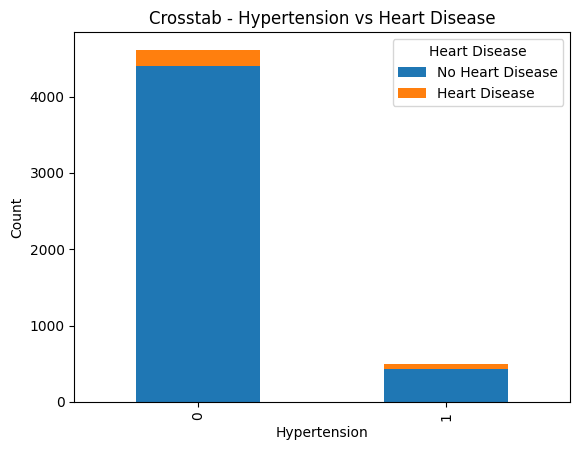

In [ ]:
#7.Create a crosstab to show the count of people with hypertension and heart disease using cross tab
crosstab_hypertension_heart_disease = pd.crosstab(df['hypertension'], df['heart_disease'])
plt.figure(figsize=(10, 6))
crosstab_hypertension_heart_disease.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Crosstab - Hypertension vs Heart Disease')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()